In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import math 
import sklearn
import matplotlib.dates as mdates

pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
train=pd.read_csv("development_dataset.csv")
test=pd.read_csv("leaderboard_dataset.csv")
test1=pd.read_csv("Evaluation_dataset.csv")
new = train.append(test, ignore_index=True,sort=False)
data = new.append(test1, ignore_index=True,sort=False)
train.shape,test.shape,data.shape

((34000, 21), (10000, 20), (54000, 21))

In [3]:
data.VAR14=data.VAR14.replace({'.': None})
data.VAR14 = data.VAR14.astype(float)

In [4]:
data['abnew1']=data['VAR3']*data['VAR12']
data['abnew2']=data['VAR4']/data['VAR12']
data['abnew3']=data['VAR3']/data['VAR16']
data['abnew4']=data['VAR6']*data['VAR12']
data['abnew8']=data['VAR4']*data['VAR5']
data['abnew5']=np.sqrt(data['VAR6']/data['VAR16'])
data['abnew6']=np.sqrt(data['VAR6']/data['VAR8'])
data['abnew7']=np.sqrt(data['VAR8']/data['VAR7'])


data['new1']=data['VAR3']-data['VAR6']
data['new2']=data['VAR7']+data['VAR8']
data['new3']=data['VAR7']/data['new2']
data['new4']=data['new1']/data['VAR6']
data['new5']=data['VAR2']/data['VAR4']
data['new6']=data['VAR2']/data['VAR20']
data['new7']=data['VAR4']*data['VAR20']
data['new8']=data['VAR5']/data['VAR7']
data['new10']=data['VAR11']/data['VAR13']
data['new11']=data['VAR9']/data['VAR14']
data['new12']=data['new11']*data['VAR10']
data['new13']=data['VAR13']/(data['VAR13']*data['VAR15'])
data['new14']=data['VAR11']/data['VAR12']
data['new15']=data['VAR14']+data['VAR18']
data['new16']=data['VAR16']/data['VAR7']

In [5]:
#data['abnew10']=data['VAR4']*data['VAR8']
#data['abnew12']=train['VAR20']*1.66-(train['VAR5']*train['VAR10']/100)

#data['new17']=data['VAR7']-data['VAR8']

In [6]:
# data['abnew1']=data['VAR3']*data['VAR12']
# data['abnew2']=data['VAR4']/data['VAR12']
# data['abnew3']=data['VAR3']/data['VAR16']

# data['new1']=data['VAR3']-data['VAR6']
# data['new5']=data['VAR2']/data['VAR4']
# data['new6']=data['VAR2']/data['VAR20']
# data['new7']=data['VAR4']*data['VAR20']

In [7]:
# #data.replace([np.inf, -np.inf], np.nan,inplace=True)
# data1=data.copy()
# del data['VAR1']
# data['VAR10'].fillna(method='ffill', inplace=True)
# del data['VAR21']


In [8]:
data1=data.copy()
del data['VAR1']
data['VAR10'].fillna(method='ffill', inplace=True)
del data['VAR21']


# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# data_cols = list(data)
# data = pd.DataFrame(IterativeImputer(random_state=1,max_iter=200, sample_posterior=True,verbose=2,min_value=0.0).fit_transform(data))
# data.columns = data_cols


data.head()

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,...,new6,new7,new8,new10,new11,new12,new13,new14,new15,new16
0,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,0.279273,...,8.273666,32176.604376,578.716650,0.279273,NaN,NaN,1.0,0.002790,2.0,1.424432
1,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,58.632548,NaN,...,6.217113,NaN,454.878683,NaN,22.086661,NaN,NaN,NaN,1.0,1.200921
2,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,0.453212,...,9.794984,3508.913204,854.368651,0.045321,NaN,NaN,0.1,0.002156,1.0,1.449230
3,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,NaN,...,6.339107,NaN,777.935106,NaN,4.363431,255.839077,NaN,NaN,2.0,1.396859
4,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,NaN,...,9.026673,NaN,456.334881,NaN,NaN,NaN,NaN,NaN,NaN,1.135049


In [9]:
features = data.columns.values[:]

for feature in features:
    temp = data[feature].value_counts(dropna=True)

    data[feature + 'vc'] = data[feature].map(temp).map(lambda x: min(10, x)).astype(np.uint8)

    data[feature + 'sum'] = ((data[feature] - data[feature].mean()) * data[feature + 'vc'].map(lambda x: int(x > 1))).astype(np.float32)
    
    data[feature + 'sum2'] = ((data[feature]) * data[feature + 'vc'].map(lambda x: int(x > 2))).astype(np.float32)

    data[feature + 'sum3'] = ((data[feature]) * data[feature + 'vc'].map(lambda x: int(x > 4))).astype(np.float32) 
     
    
print('Data set shape after creating magic features: {}'.format(data.shape))

Data set shape after creating magic features: (54000, 210)


In [10]:
# data.head()

In [11]:
data['VAR21']=data1['VAR21']
train_x=data[~data['VAR21'].isnull()]
train_x['VAR21'] = train_x['VAR21'].replace({'Low':0, 'Medium':1, 'High':2})
train_x.VAR21 = train_x.VAR21.astype(int)
train_y=train_x['VAR21']
lead_eval=data[data['VAR21'].isnull()]
sh=test.shape[0]
test_x1=lead_eval.iloc[:sh,:]
test_x2=lead_eval.iloc[sh:,:]

del train_x['VAR21']
del test_x1['VAR21']
del test_x2['VAR21']

In [12]:

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics.scorer import make_scorer
# X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 10, stratify=train_y)
# def my_custom_score(y_valid, predxgb):
#     c = confusion_matrix(y_valid, predxgb)
#     result = 1000*(c[0,0]+c[1,1]+c[2,2]) - 100*(c[0,1]+c[1,2]+c[2,0]) -200*c[0,2] -50*(c[1,0]+c[2,1])

#     return result

# scorer = make_scorer(my_custom_score, greater_is_better=True)

# modelxgb   =    XGBClassifier( max_delta_step=0,
#                 missing=None, n_jobs=-1,
#                 nthread=-1, random_state=0,
#                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#                 silent=True, verbosity=3)

# grid_values = {
#     'learning_rate': [0.09,0.1], 'max_depth' : [6,7], 'n_estimators' :[90,100]
# }

# grid = GridSearchCV(modelxgb, param_grid = grid_values, scoring=scorer, n_jobs=-1, return_train_score=False)
# grid.fit(X_train, y_train)
# predxgb    =    grid.predict(X_valid)
# print('Grid best parameter: ',grid.best_params_)
# print('Grid best score: ',grid.best_score_)

In [13]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 10, stratify=train_y)
def my_custom_score(y_valid, predxgb):
    c = confusion_matrix(y_valid, predxgb)
    result = (1000*(c[0,0]+c[1,1]+c[2,2])) - (100*(c[0,1]+c[1,2]+c[2,0])) -(200*c[0,2]) -(50*(c[1,0]+c[2,1]))

    return result

In [19]:
from xgboost import XGBClassifier

modelxgb=XGBClassifier(
                         n_jobs=-1,
                         n_thread=-1,
                        colsample_bylevel=0.7,colsample_bynode=0.9, colsample_bytree=1,
                        gamma=5,learning_rate=0.1, max_delta_step=0, max_depth=9,n_estimators=3000,
                        min_child_weight=1, objective='multi:softmax', random_state=0,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1,subsample=1, verbosity=1
                        )
modelxgb.fit(X_train, y_train,eval_set=[(X_valid, y_valid)], early_stopping_rounds=200,verbose=100)

[0]	validation_0-merror:0.430147
Will train until validation_0-merror hasn't improved in 200 rounds.
[100]	validation_0-merror:0.408529
[200]	validation_0-merror:0.406618
Stopping. Best iteration:
[78]	validation_0-merror:0.406324



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=0.8, colsample_bytree=0.8, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=3000, n_jobs=-1,
              n_thread=-1, nthread=None, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [320]:
#406618
from xgboost import XGBClassifier

modelxgb=XGBClassifier(
                         n_jobs=-1,
                         n_thread=-1,
                        colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.8,
                        gamma=5,learning_rate=0.01, max_delta_step=0, max_depth=12,n_estimators=3000,
                        min_child_weight=1, objective='multi:softmax', random_state=0,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1,subsample=1, verbosity=1
                        )
modelxgb.fit(X_train, y_train,eval_set=[(X_valid, y_valid)], early_stopping_rounds=200,verbose=100)

In [20]:
%%time
import xgboost
from xgboost import XGBClassifier

modelxgb = XGBClassifier(
                          n_jobs=-1,
                         n_thread=-1,
                        colsample_bylevel=0.7,colsample_bynode=0.8, colsample_bytree=0.9,
                        gamma=5,learning_rate=0.1, max_delta_step=0, max_depth=9,n_estimators=150,
                        min_child_weight=1, objective='multi:softmax', random_state=0,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1,subsample=1, verbosity=1
                        )
modelxgb.fit(train_x, train_y)
predxgb1 = modelxgb.predict(test_x1)
predxgb2 = modelxgb.predict(test_x2)
# modelxgb.fit(X_train, y_train)
# predxgb = modelxgb.predict(X_valid)
# print(my_custom_score(y_valid, predxgb))

Wall time: 1min 29s


In [21]:
a=pd.DataFrame()
a['pred']=predxgb1
a['pred'] = a['pred'].replace({0:'Low', 1:'Medium', 2:'High'})

b=pd.DataFrame()
b['pred']=predxgb2
b['pred'] = b['pred'].replace({0:'Low', 1:'Medium', 2:'High'})

final=pd.DataFrame()
final['Col1'] = test['VAR1']
final['Col2'] =a['pred']
final.to_csv('KManalytica_IITRoorkee_100.csv', index=False, header=False)

final2=pd.DataFrame()
final2['Col1'] = test1['VAR1']
final2['Col2'] =b['pred']
final2.to_csv('eval_KManalytica_IITRoorkee_100.csv', index=False, header=False)

In [9]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from datetime import datetime

In [ ]:

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics.scorer import make_scorer
# X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 10, stratify=train_y)
# def my_custom_score(y_valid, predxgb):
#     c = confusion_matrix(y_valid, predxgb)
#     result = 1000*(c[0,0]+c[1,1]+c[2,2]) - 100*(c[0,1]+c[1,2]+c[2,0]) -200*c[0,2] -50*(c[1,0]+c[2,1])

#     return result

# scorer = make_scorer(my_custom_score, greater_is_better=True)

# modelxgb   =    XGBClassifier( max_delta_step=0,
#                 missing=None, n_jobs=-1,
#                 nthread=-1, random_state=0,
#                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#                 silent=True, verbosity=3)

# grid_values = {
#     'learning_rate': [0.09,0.1], 'max_depth' : [6,7], 'n_estimators' :[90,100]
# }

# grid = GridSearchCV(modelxgb, param_grid = grid_values, scoring=scorer, n_jobs=-1, return_train_score=False)
# grid.fit(X_train, y_train)
# predxgb    =    grid.predict(X_valid)
# print('Grid best parameter: ',grid.best_params_)
# print('Grid best score: ',grid.best_score_)

In [ ]:
# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer
X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size = 0.2, random_state = 10, stratify=train_y)
def my_custom_score(y_valid, predxgb):
    c = confusion_matrix(y_valid, predxgb)
    result = 1000*(c[0,0]+c[1,1]+c[2,2]) - 100*(c[0,1]+c[1,2]+c[2,0]) -200*c[0,2] -50*(c[1,0]+c[2,1])

    return result

scorer = make_scorer(my_custom_score, greater_is_better=True)
        
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0, 1, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [6, 8, 10, 12, 14]
        }
xgb = XGBClassifier(learning_rate=0.01, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=-1)
# folds = 3
param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1995)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring=scorer, n_jobs=-1,verbose=3, random_state=1995 )

# # Here we go
# start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(train_x,train_y)
# timer(start_time) # timing ends here for "start_time" variable

random_search.fit(X_train, y_train)
predxgb    =    random_search.predict(X_valid)
print('Grid best parameter: ',random_search.best_params_)
print('Grid best score: ',random_search.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [97]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([1629.21713395, 2146.20552783,  482.40100241, 1884.52070851,
       1014.06387281]), 'std_fit_time': array([195.24458535, 234.8539422 ,  60.57153827, 143.13823951,
       106.32184391]), 'mean_score_time': array([1.28510017, 2.88387322, 0.47805128, 2.28283219, 1.02498565]), 'std_score_time': array([0.1285068 , 0.61402082, 0.02597783, 0.20703962, 0.41827328]), 'param_subsample': masked_array(data=[0.6, 0.6, 1.0, 1.0, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[10, 5, 1, 5, 10],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[12, 15, 5, 12, 9],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 5, 1, 2, 5],
             mask=[False, False, False, False, Fal

In [60]:
%%time
import xgboost
from xgboost import XGBClassifier

modelxgb = XGBClassifiermodelxgb=XGBClassifier(
                         n_jobs=-1,
                         n_thread=-1,
                        colsample_bylevel=0.7,colsample_bynode=0.8, colsample_bytree=1,
                        gamma=5,learning_rate=0.1, max_delta_step=0, max_depth=9,
                        min_child_weight=1, n_estimators=167,objective='multi:softmax', random_state=0,
                        reg_alpha=0, reg_lambda=1, scale_pos_weight=1,subsample=1, verbosity=1
                        )
modelxgb.fit(train_x, train_y)
predxgb1 = modelxgb.predict(test_x1)
predxgb2 = modelxgb.predict(test_x2)

Wall time: 2min 45s


In [97]:
a=pd.DataFrame()
a['pred']=predxgb1
a['pred'] = a['pred'].replace({0:'Low', 1:'Medium', 2:'High'})

b=pd.DataFrame()
b['pred']=predxgb2
b['pred'] = b['pred'].replace({0:'Low', 1:'Medium', 2:'High'})

final=pd.DataFrame()
final['Col1'] = test['VAR1']
final['Col2'] =a['pred']
final.to_csv('KManalytica_IITRoorkee_90.csv', index=False, header=False)

final2=pd.DataFrame()
final2['Col1'] = test1['VAR1']
final2['Col2'] =b['pred']
final2.to_csv('eval_KManalytica_IITRoorkee_90.csv', index=False, header=False)

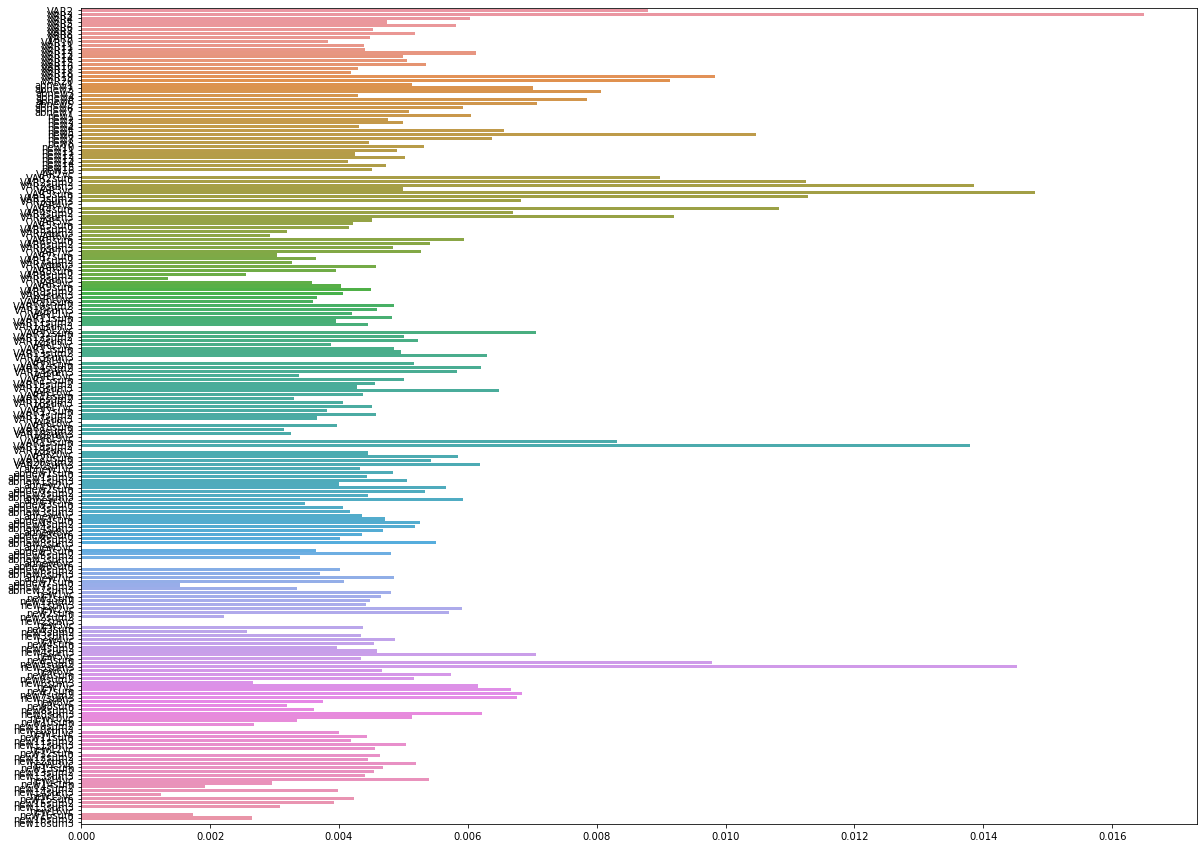

In [99]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.barplot(modelxgb.feature_importances_, train_x.columns)

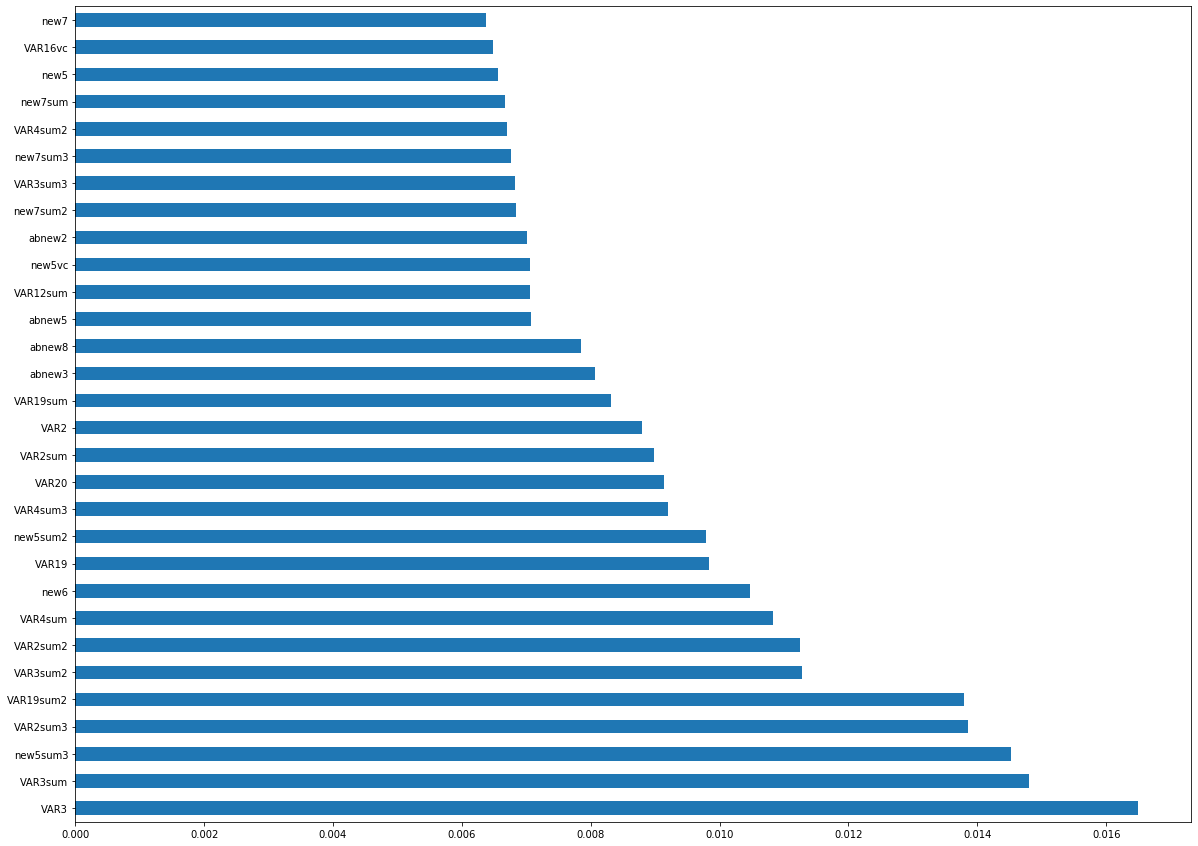

In [234]:
plt.figure(figsize=(20,15))
feat_importances = pd.Series(modelxgb.feature_importances_, index=train_x.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [146]:
a=feat_importances.nlargest(25).index
a

Index(['VAR3', 'new6', 'VAR2', 'VAR4', 'VAR20', 'new5', 'abnew3', 'VAR19',
       'new7', 'abnew5', 'VAR13', 'abnew1', 'VAR6', 'abnew2', 'VAR12', 'new1',
       'abnew6', 'VAR7', 'VAR14', 'VAR15', 'new8', 'new3', 'abnew4', 'new10',
       'abnew7'],
      dtype='object')